In [224]:
import numpy as np
import pandas as pd


In [225]:

data = {
    "mother": [58,62,60,64,67,70],
    "daughter": [60,60,58,60,70,72]
}

df = pd.DataFrame(data)
print(df)

   mother  daughter
0      58        60
1      62        60
2      60        58
3      64        60
4      67        70
5      70        72


In [226]:
#performing gradient descent
b0, b1 = 0, 0
alpha = 0.0001

epoch_error = []

#stochastic (example by example)
epocs = 4
for _ in range(epocs):
    for i in range(df.shape[0]):
        xi = df["mother"][i]
        #pi = b0 + b1*xi
        pi = b0 + b1*xi
        yi = df["daughter"][i]
        error = pi-yi
        epoch_error.append(abs(error))
        b0 = b0 - alpha*error
        b1 = b1 - alpha*error*xi

        if i == df.shape[0]-1:
            prediction = b0 + b1*df["mother"]
            mse = np.sum(((prediction - df["daughter"])**2) / df.shape[0])
            # print(mse)

            rmse = mse**0.5

            print("mse: ", mse)
            print("rmse: ", rmse)
            
        # print(b0, b1)

prediction = b0 + b1*df["mother"]
print(prediction)

mse:  9.784174083274436
rmse:  3.1279664453562215
mse:  7.738860238672967
rmse:  2.7818807017327263
mse:  7.9745684305625435
rmse:  2.8239278373504066
mse:  7.985382074972457
rmse:  2.8258418347410132
0    58.881798
1    62.941480
2    60.911639
3    64.971321
4    68.016082
5    71.060844
Name: mother, dtype: float64


In [227]:
#mse 
mse = np.sum(((prediction - df["daughter"])**2) / df.shape[0])

#rmse
rmse = mse**0.5
print("mse: ", mse) 
print("rmse: ", rmse)

mse:  7.985382074972457
rmse:  2.8258418347410132


In [228]:
print(b0 + b1*63)

63.956400249074235


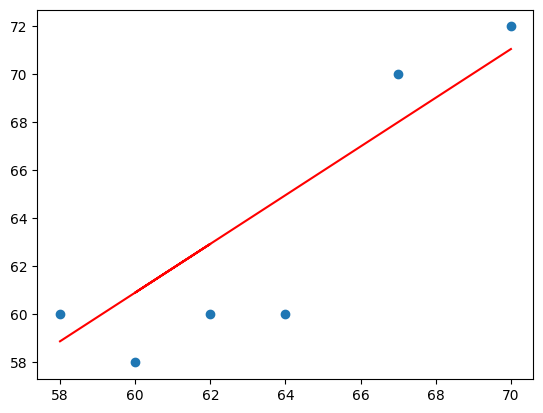

In [229]:
import matplotlib.pyplot as plt
plt.scatter(df["mother"], df["daughter"])
plt.plot(df["mother"], prediction, 'r')
plt.show()

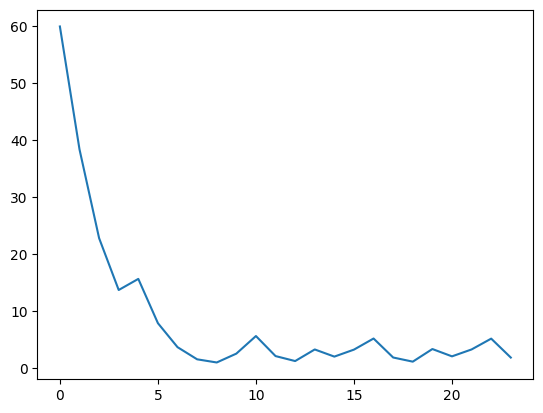

In [230]:
import matplotlib.pyplot as plt

plt.plot( epoch_error)

plt.show()

In [231]:
from sklearn.linear_model import LinearRegression

x = np.array(data["mother"]).reshape(-1,1)
y = np.array(data["daughter"]).reshape(-1,1)

model = LinearRegression()
model.fit(x,y)

# model.coef_
print(model.intercept_, model.coef_)
print(b0, b1)

[-13.24958124] [[1.20603015]]
0.016406249586034958 1.0149205396744159


In [232]:
mse = np.sum((prediction - df["daughter"])**2) / len(x)
# print(mse)

rmse = mse**0.5

print(mse)
print(rmse)

7.985382074972457
2.8258418347410132


### Q2: Logistics Regression , Gradient Descent

In [233]:
data = {
    "time": [1,2,3,4,5,6,7,8],
    "pass": [0,0,0,0,1,1,1,1]
}

df = pd.DataFrame(data)

In [234]:
b0,b1=0,0
alpha = 0.01

epochs =4000
iter_errors=[]

for _ in range(epochs):
    for i in range(df["pass"].shape[0]):
        xi = df["time"][i]
        z = b0 + b1*xi
        pi = 1.0 / (1 + np.exp(-z))

        yi = df["pass"][i]
        error = yi - pi
        iter_errors.append(abs(error))
        b0 = b0 + (alpha * error * pi * (1-pi) * 1)
        b1 = b1 + (alpha * error * pi * (1-pi) * xi)

print(b0, b1)

-4.243913473879936 0.9847704431179426


In [235]:
from sklearn.linear_model import LogisticRegression

x = np.array(df["time"]).reshape(-1,1)
y = np.array(df["pass"]).reshape(-1,1)

model = LogisticRegression()
model.fit(x, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[1.16979937]]
Intercept: [-5.26410791]


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [236]:
predicted = []
for item in x:
    prob = 1/(1 + np.exp(-(b0 + b1*item)))
    print(prob)
    if prob > 0.51:
        predicted.append(1)
    else:
        predicted.append(0)

predicted

[0.03699973]
[0.09326777]
[0.21592016]
[0.42437676]
[0.66372503]
[0.84086914]
[0.93397891]
[0.97427549]


[0, 0, 0, 0, 1, 1, 1, 1]

In [237]:
#print accuracy of manually implemented logistic regression
accuracy = np.sum(predicted == df["pass"]) / len(df["pass"])
print(accuracy)


1.0


In [238]:
print(b0, b1)

def getPrediction(time):
    z = b0 + b1*time
    prob = 1 / (1 + np.exp(-z))
    if prob > 0.51:
        return 1
    else:
        return 0

print(getPrediction(3.5))
print(getPrediction(7.5))



-4.243913473879936 0.9847704431179426
0
1


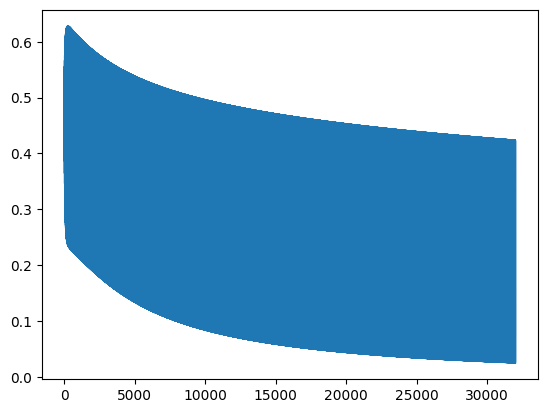

In [239]:
import matplotlib.pyplot as plt

plt.plot(iter_errors)
plt.show()

### Q3 two independent variable logistic regression

In [240]:
import pandas as pd

# Creating the data dictionary
data = {
    "x1": [4, 2, 1, 3, 1, 6],
    "x2": [1, 8, 0, 2, 4, 7],
    "y": [2, -14, 1, -1, -7, -8]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Convert 'y' to binary values (e.g., 1 if y > 0, else 0)
df['y'] = df['y'].apply(lambda y: 1 if y > 0 else 0)

# Display the DataFrame
print(df)


   x1  x2  y
0   4   1  1
1   2   8  0
2   1   0  1
3   3   2  0
4   1   4  0
5   6   7  0


In [241]:
b0,b1, b2=0,0, 0
alpha = 0.01

epochs =3
iter_errors=[]

for _ in range(epochs):
    for i in range(len(df["y"])):
        x1 = df["x1"][i]
        x2 = df["x2"][i]
        z = b0 + b1*x1 + b2*x2
        pi = 1.0 / (1 + np.exp(-z))

        yi = df["y"][i]
        error = yi - pi
        iter_errors.append(abs(error))
        b0 = b0 + (alpha * error * pi * (1-pi) * 1)
        b1 = b1 + (alpha * error * pi * (1-pi) * df["x1"][i])
        b2 = b2 + (alpha * error * pi * (1-pi) * df["x2"][i])

print(b0, b1, b2)

-0.005876110308172723 -0.02022217671050783 -0.06554454567854749
